In [22]:
# Data Tools
import pandas as pd
import numpy as np

# Graphing Tools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [20,10]
plt.rcParams["font.size"] = 20

# Machine Learning Tools
from sklearn import tree

In [25]:
df = pd.read_csv('HRData.csv')
df.tail()

,satisfaction,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,salary_bracket,resigned_label,Unnamed: 11
14993,0.92,0.82,4,96,4,0,0,IT,87000,medium,0,no
14994,0.34,0.67,5,96,2,1,0,IT,54000,low,0,no
14995,0.15,0.98,2,96,2,0,0,sales,103000,high,0,no
14996,0.50,0.58,4,96,3,0,0,sales,48000,low,0,no
14997,0.79,0.61,5,96,4,0,0,marketing,73000,medium,0,no


In [28]:
df.describe()

,satisfaction,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,salary,resigned_label
count,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000
mean,0.613666,0.715373,3.808041,200.958328,3.501400,0.143753,0.022670,66977.730364,0.232764
std,0.248134,0.170996,1.229061,49.846864,1.473318,0.350850,0.148853,29179.886862,0.422607
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,30000.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,47000.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,64000.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,79000.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,299000.000000,1.000000


<AxesSubplot:xlabel='resigned_label', ylabel='satisfaction'>

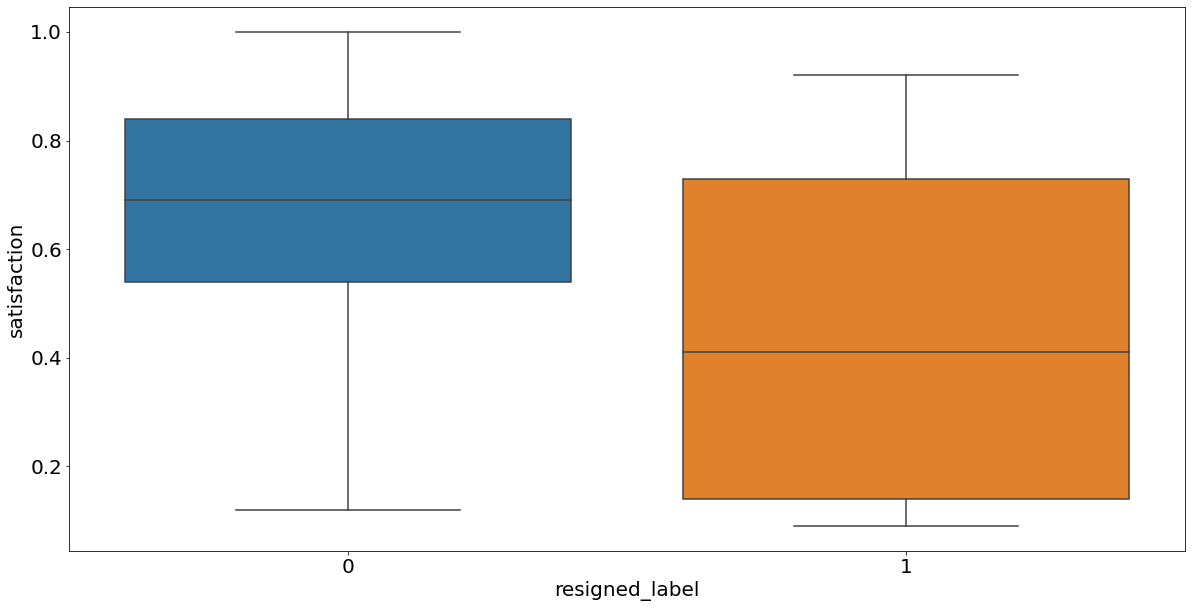

In [30]:
sns.boxplot(x=df['resigned_label'], y=df['satisfaction'], showfliers=False)

<AxesSubplot:xlabel='department', ylabel='salary'>

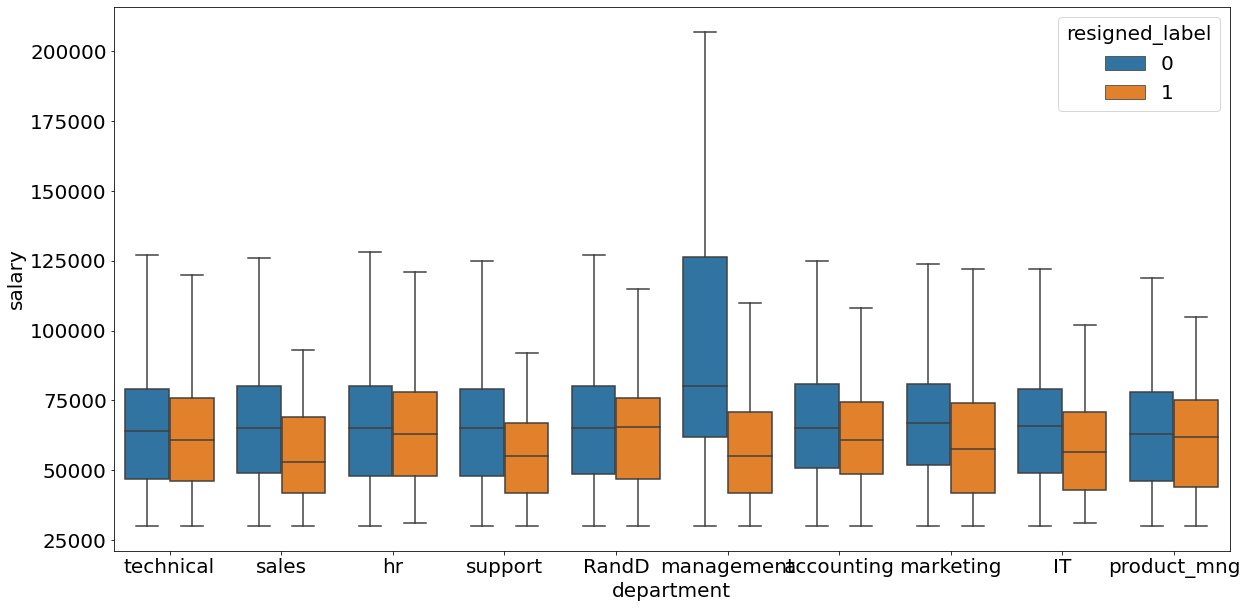

In [31]:
sns.boxplot(x=df['department'], y=df['salary'], hue=df['resigned_label'], showfliers=False)

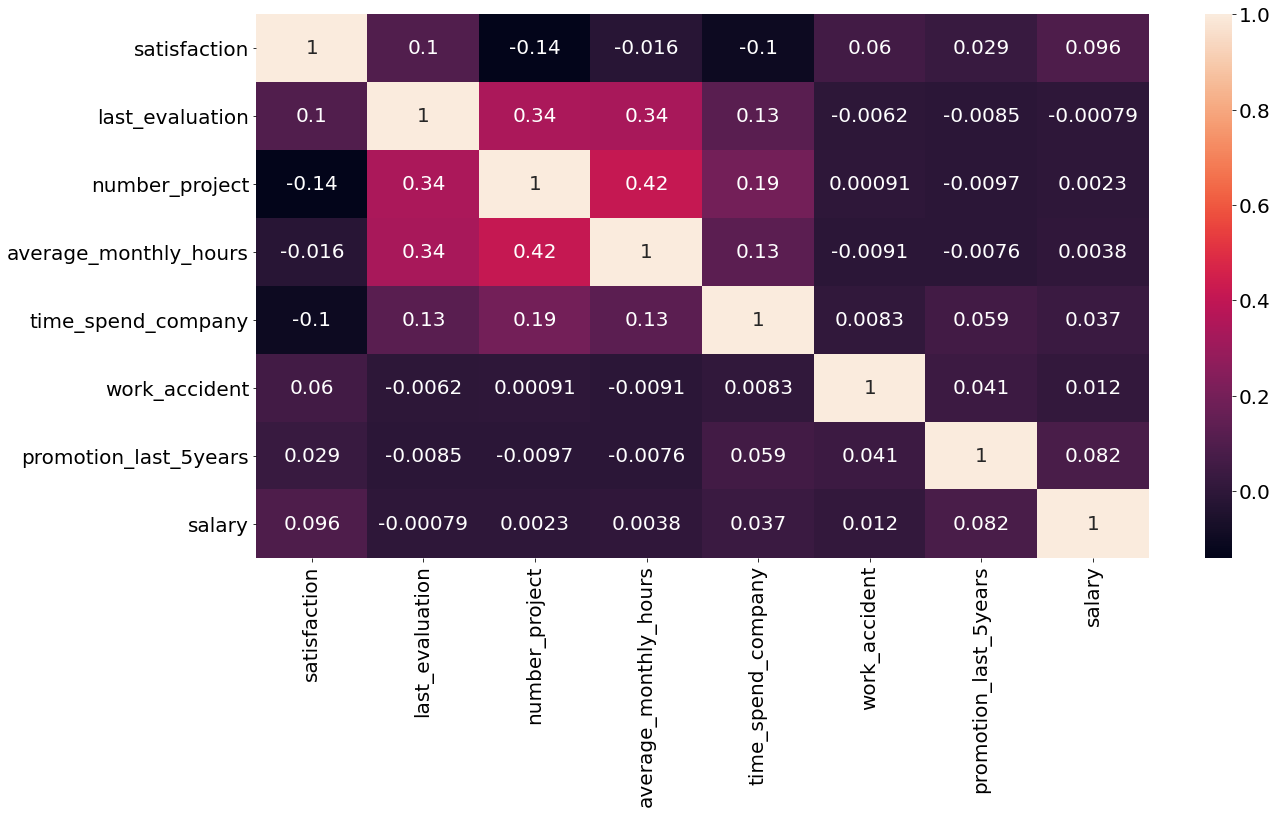

In [32]:
corrMatrix = df.drop(['resigned_label', 'department'], axis=1).corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

# 1.1 Ultra Fancy Machine Learning

In [33]:
X = df.drop(['resigned_label'], axis=1)
X = pd.get_dummies(X)
y = df['resigned_label']

In [38]:
clf = tree.DecisionTreeClassifier(max_depth=4)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=4)

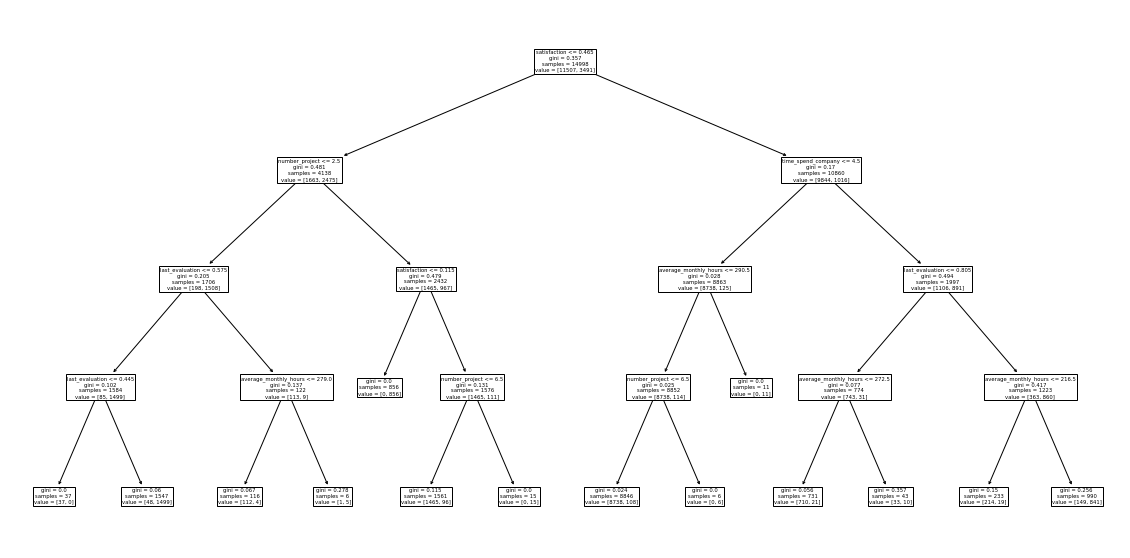

In [39]:
p = tree.plot_tree(clf, feature_names=list(X.columns.values))